## Consuming data using Kafka
In this task, we will implement an Apache Kafka consumer to consume the data from part 2.  

In this part, use Kafka consumer to consume the streaming data published from task 2.8.  
This part doesn’t require parallel processing, please do not use Spark in this part. Using pandas or Python functions to do the simple calculations for visualisation.  

In [1]:
from kafka3 import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from json import loads
import ast
import json
import pandas as pd

In [2]:
%matplotlib notebook
# plt.ion()

## 1. Plot a diagram with two subplots to show the 30-second sales.  
Left subplot: Show a bar chart of sales every 30 seconds;  
Right Subplot: Show a line chart of cumulative sales.


In [3]:
# Consumer
hostip = "118.139.68.67"
topic = "potential_revenue"

In [4]:
def connect_kafka_consumer(topic= None):
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=600000, # stop iteration if no message after 60 sec
                                   #auto_offset_reset='latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

In [5]:
def extract_start_time(row):
    time_start = row["start"]
    return time_start

def extract_end_time(row):
    end_time = row["end"]
    return end_time

In [6]:
def init_plots():
    try:
        fig, (left_subplot, right_subplot) = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle("30 seconds potential Revenue and Accumulate Revenue")
        
        left_subplot.set_xlabel('Time')
        left_subplot.set_ylabel('Revenue')
        
        right_subplot.set_xlabel('Time')
        right_subplot.set_ylabel('Revenue')
        
#         left_subplot.set_ylim(0,110)
#         left_subplot.set_yticks([0,20,40,60,80,100])
        fig.show()
        fig.canvas.draw()
        return fig, left_subplot, right_subplot
    except Exception as ex:
        print(str(ex))

In [7]:
def consume_message(consumer, fig, left_subplot, right_subplot):
    try:

        for message in consumer:
            data = message.value
            data = f"{data}"
            data = data.replace("'", "")
            
            df = pd.read_json(data)
            
            df["time_start"] = df["window"].apply(extract_start_time)
            df["time_end"] = df["window"].apply(extract_end_time)
            df = df.sort_values(by= "time_start")
            df["cum_sum"] = df["potential_revenue"].cumsum()
            
            
            x_1 = df["window"].tolist()
            x_1 = [f"{x}" for x in x_1]
            y_1 = df["potential_revenue"].tolist()
            x_2 = df["window"].tolist()
            x_2 = [f"{x}" for x in x_2]
            y_2 = df["cum_sum"].tolist()
            
            
            for i in range(len(x_1)):
                 
                print(f"This is {i} element")
                left_subplot.clear()
                right_subplot.clear()
                
                print(x_1[i], y_1[i])
                
                left_subplot.bar(x_1[i], y_1[i], width=0.005, align="edge")
                left_subplot.set_xlabel("Time")
                left_subplot.set_ylabel("Sales")
                left_subplot.set_title("30-Second Sales")
                
                right_subplot.plot(x_2[:i+1], y_2[:i+1])
                right_subplot.set_xlabel("Time")
                right_subplot.set_ylabel("Cumulative Sales")
                right_subplot.set_title("Cumulative Sales")
                
#                 fig.show()
                fig.canvas.draw()
                sleep(30)                

    except Exception as ex:
        print(str(ex))

<IPython.core.display.Javascript object>


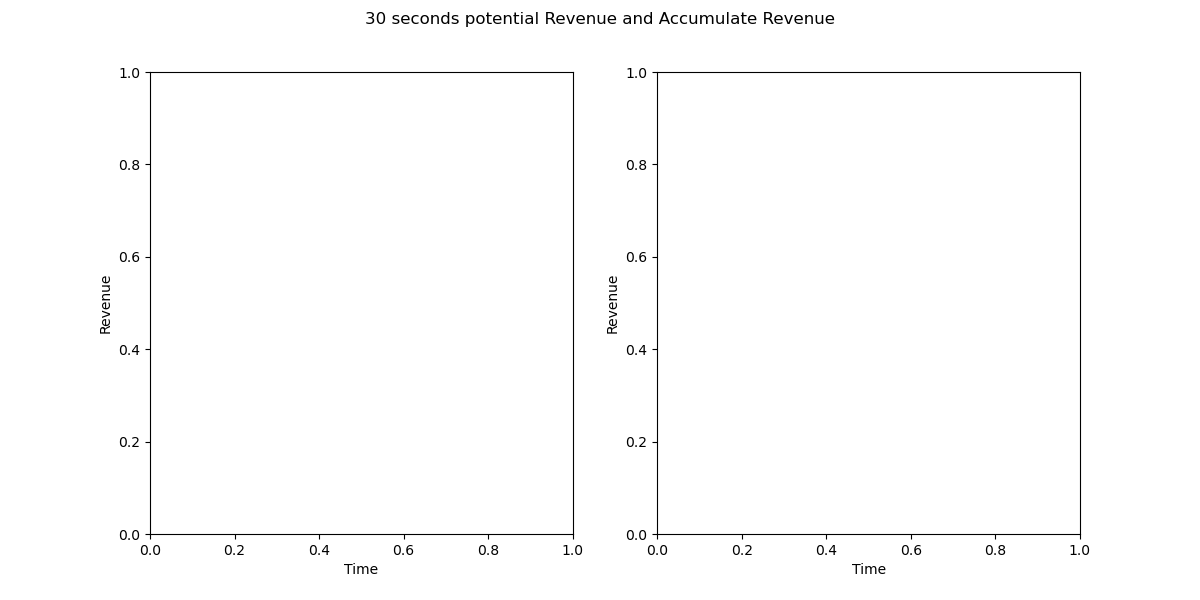

KeyboardInterrupt: 

In [8]:
if __name__ == '__main__':
    consumer = connect_kafka_consumer(topic= topic)
    fig, left_subplot, right_subplot = init_plots()
    consume_message(consumer, fig, left_subplot, right_subplot)

**Note:**
My consumer was able to consume the message from Task2 initially, however, I have no idea why it could not consume it after a while.


### 2. Plot either a choropleth or bubble map of Indonesia and show the cumulative number of predicted orders in each state. If you plot a bubble map, add markers of total order count to each state.  
(note: The streaming data is sliding, you need to consider how to calculate the cumulative sum.)
